In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

In [ ]:
%pip install opencv-python

In [6]:
import sys
sys.path.append('../')

In [5]:
data_folder = 'C:/dev/EuroSAT/2750/'

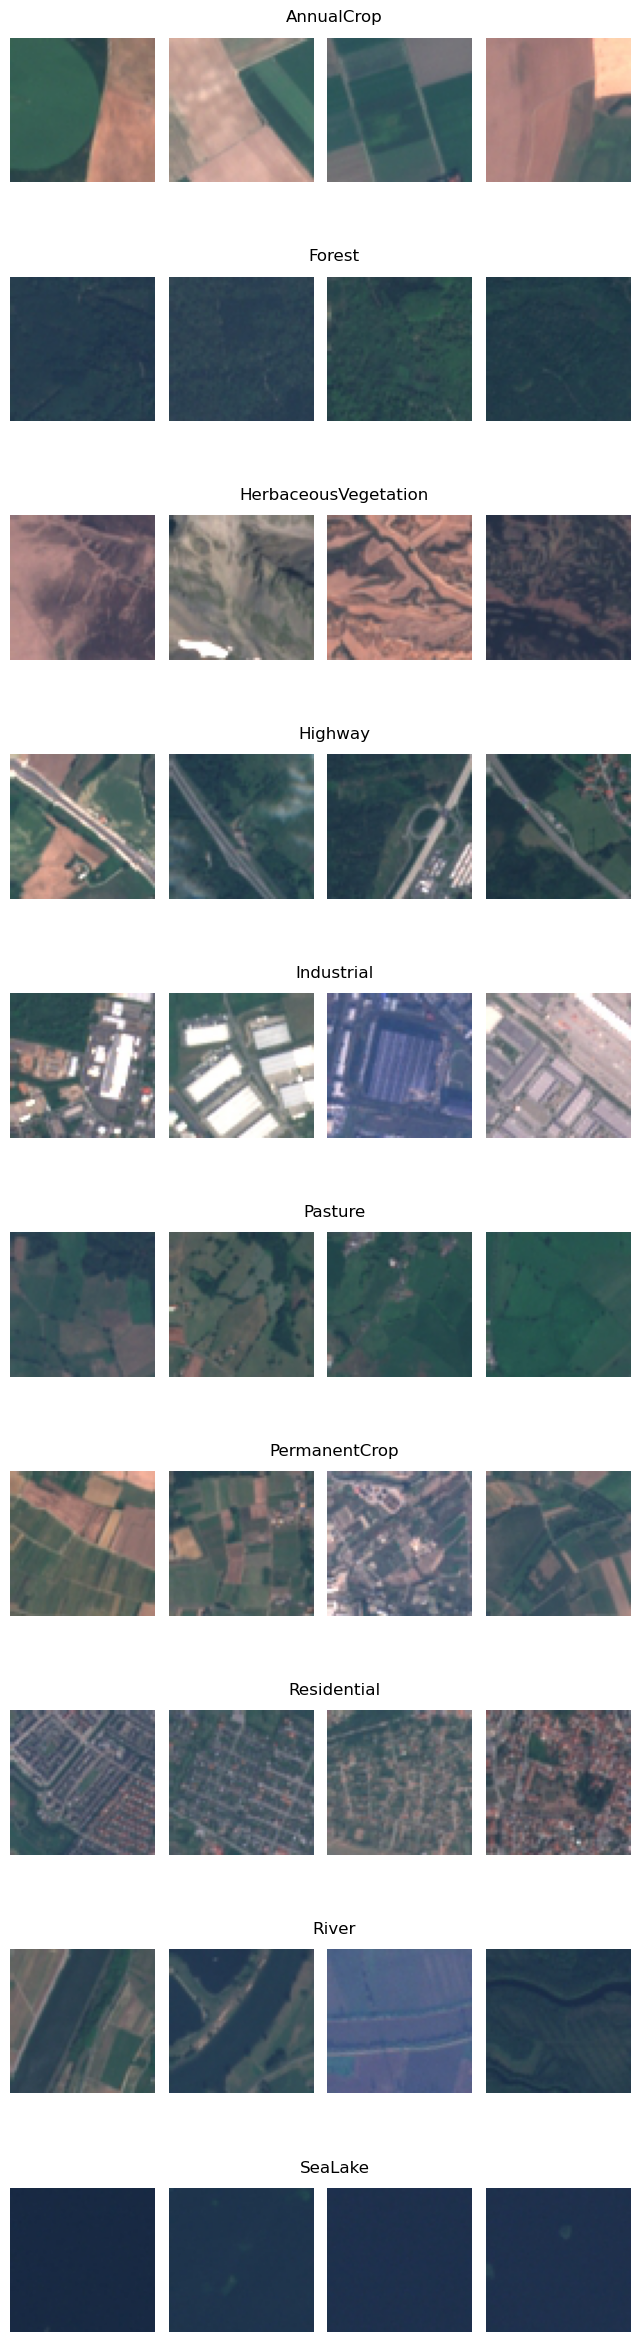

In [42]:


fig = plt.figure(figsize=(8, 30))

gs = gridspec.GridSpec(10, 4, wspace=0.1, hspace=0.5)

for i, folder_name in enumerate(os.listdir(data_folder)):
    folder_path = os.path.join(data_folder, folder_name)
    
    if not os.path.isdir(folder_path):
        continue

    img_count = 0

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpg"):
            file_path = os.path.join(folder_path, file_name)

            img = mpimg.imread(file_path)
            ax = fig.add_subplot(gs[i, img_count])
            ax.imshow(img)
            ax.axis('off')

            img_count += 1

            if img_count >= 4:
                break

    ax = fig.add_subplot(gs[i, 0])
    ax.set_title(folder_name)
    ax.title.set_position([2.25, 1.05])
    ax.axis('off')

plt.show()

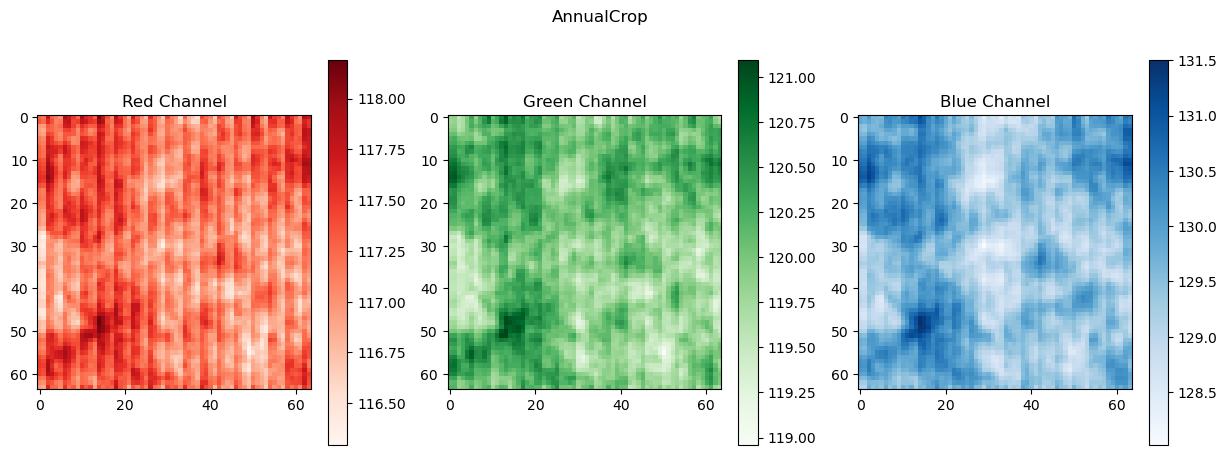

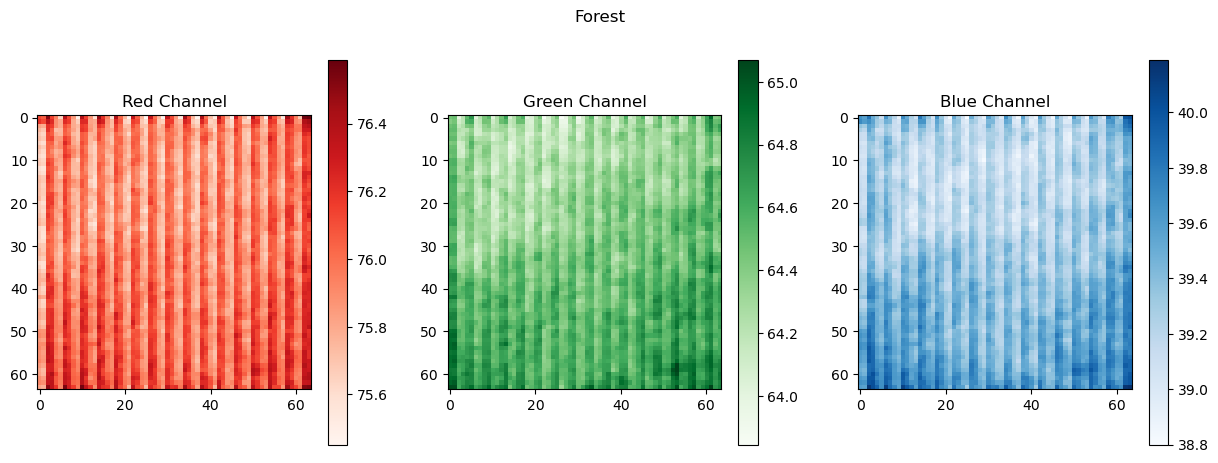

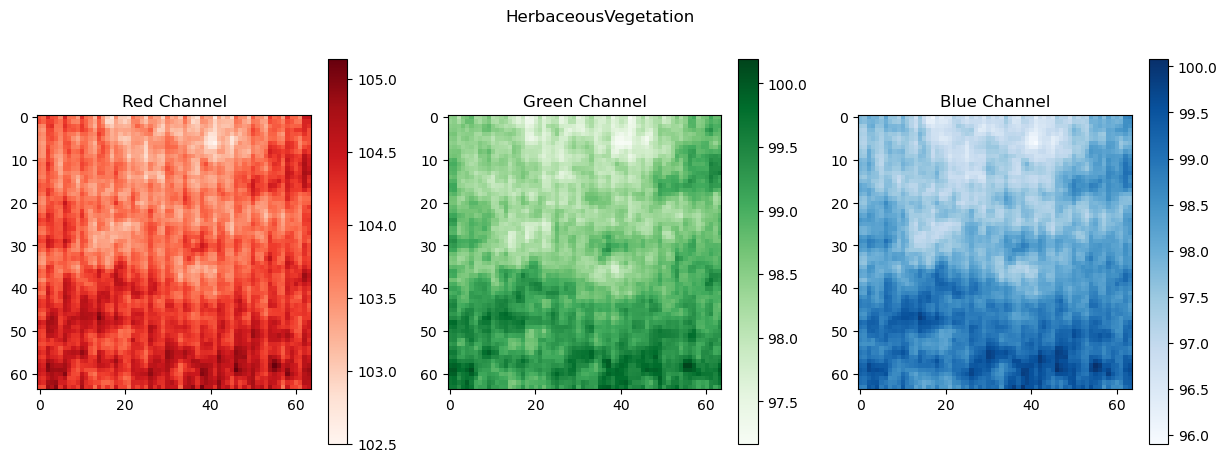

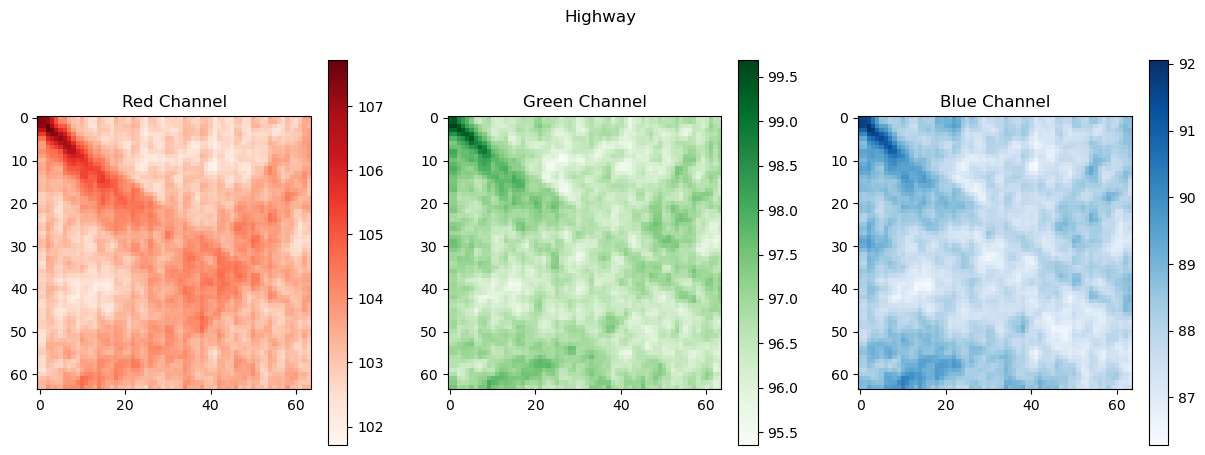

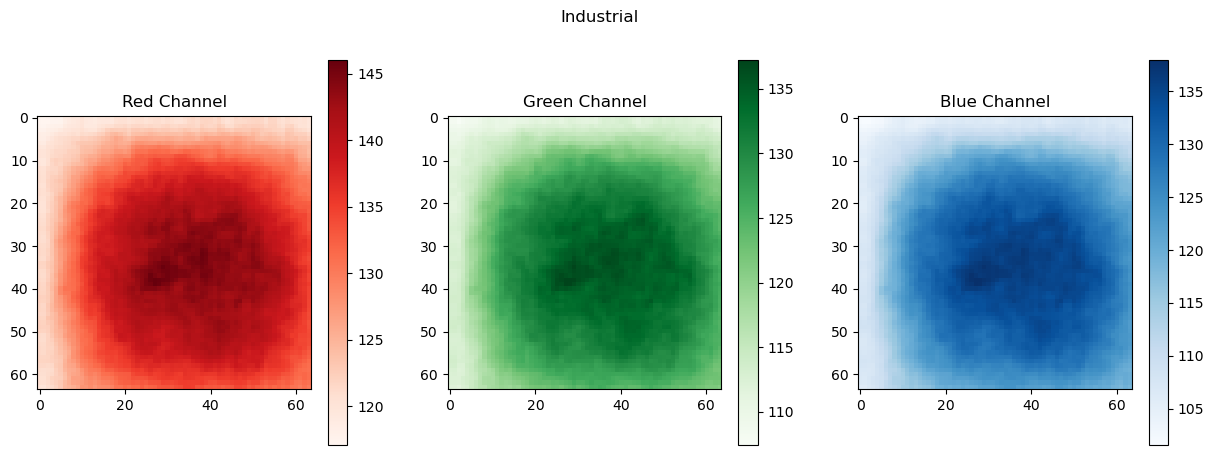

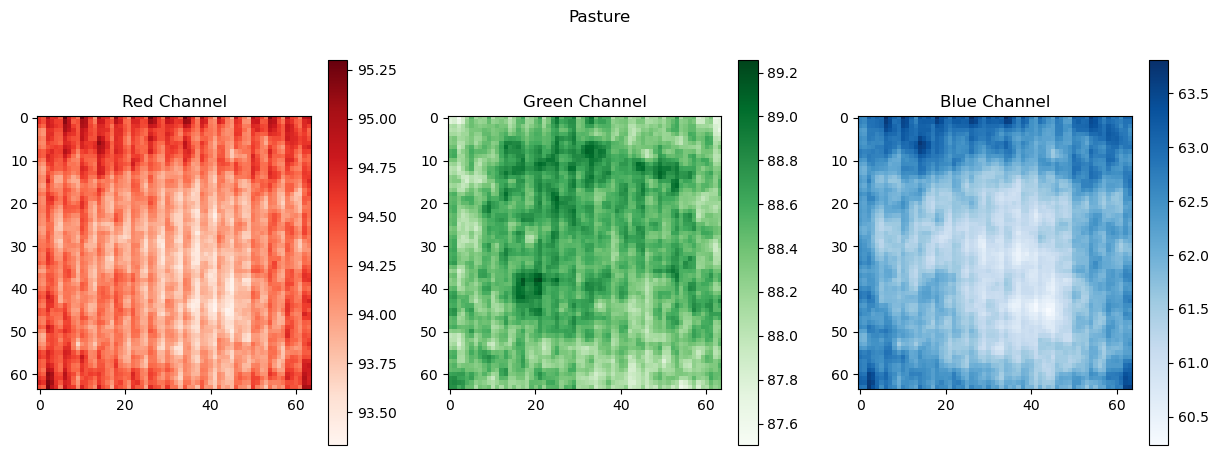

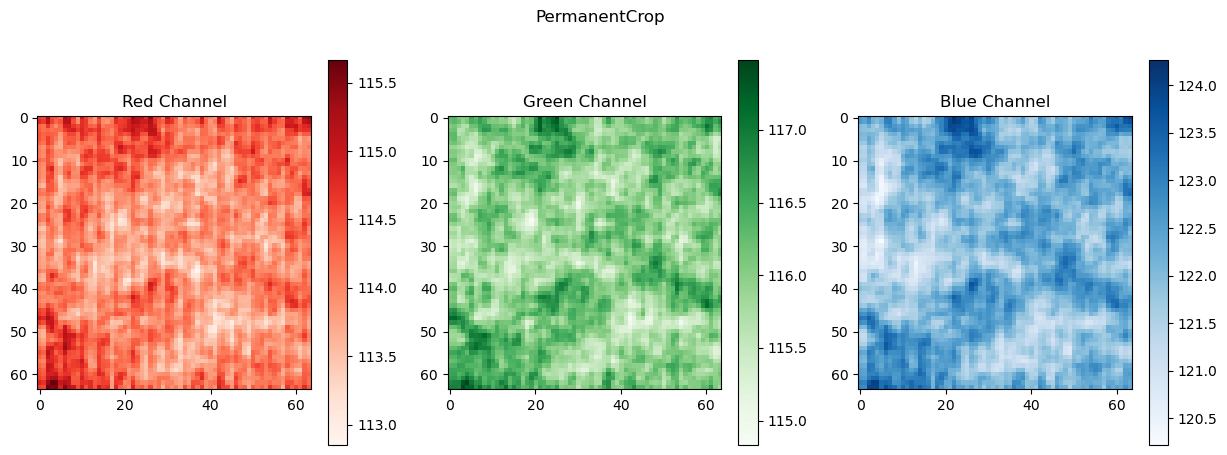

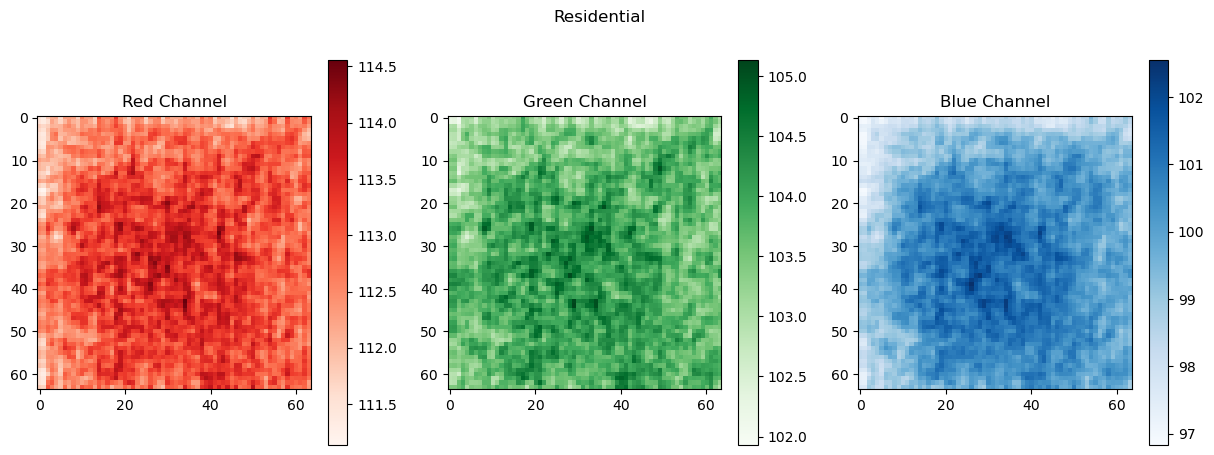

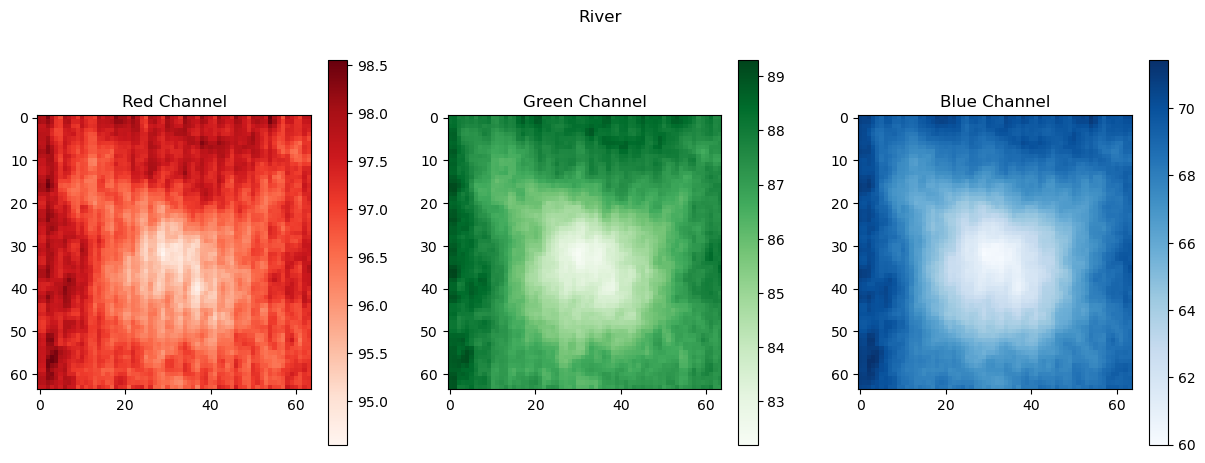

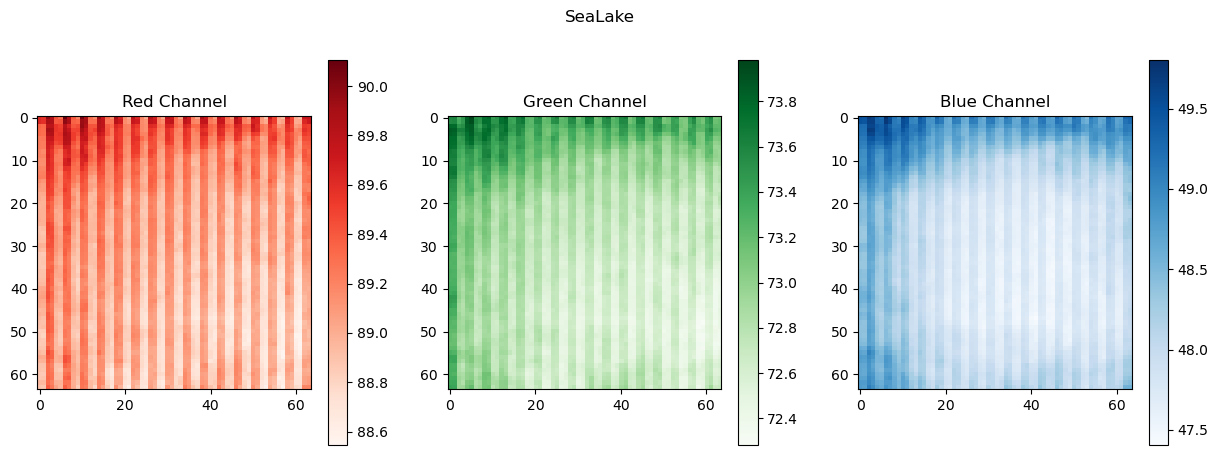

In [6]:
for folder_name in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder_name)
    
    # Skip if not a directory
    if not os.path.isdir(folder_path):
        continue

    images = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpg"):
            file_path = os.path.join(folder_path, file_name)
            
            img = cv2.imread(file_path)
            
            images.append(img)
    avg_img = np.mean(images, axis=0)

    ch1, ch2, ch3 = cv2.split(avg_img)

    color_maps = ['Reds', 'Greens', 'Blues']
    labels = ['Red Channel', 'Green Channel', 'Blue Channel']

    plt.figure(figsize=(15, 5))    
    for i, (ch, cmap, label) in enumerate(zip([ch1, ch2, ch3], color_maps, labels), start=1):
        plt.suptitle(folder_name)
        plt.subplot(1, 3, i)
        plt.imshow(ch, cmap=cmap, interpolation='nearest')
        plt.colorbar()
        plt.title(label)

    plt.show()

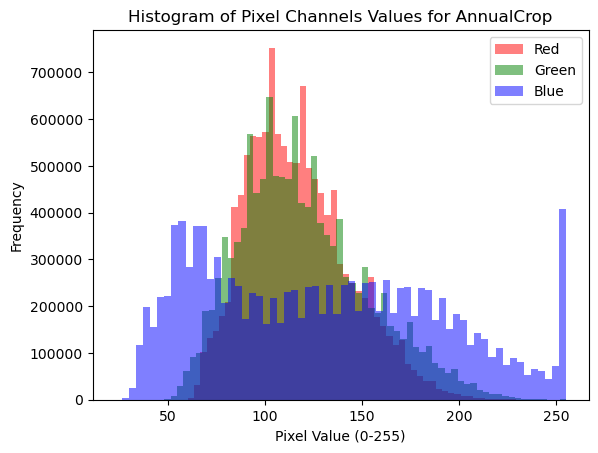

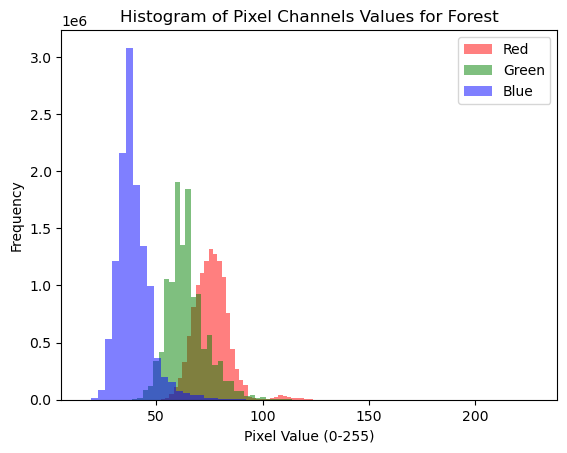

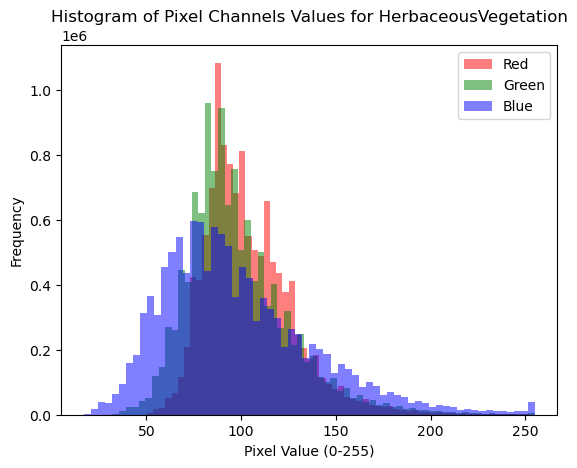

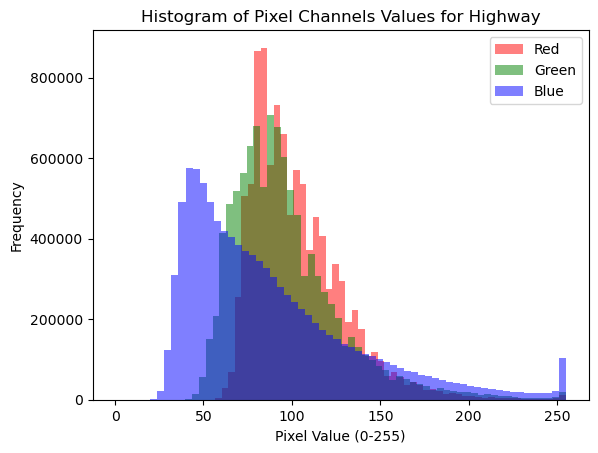

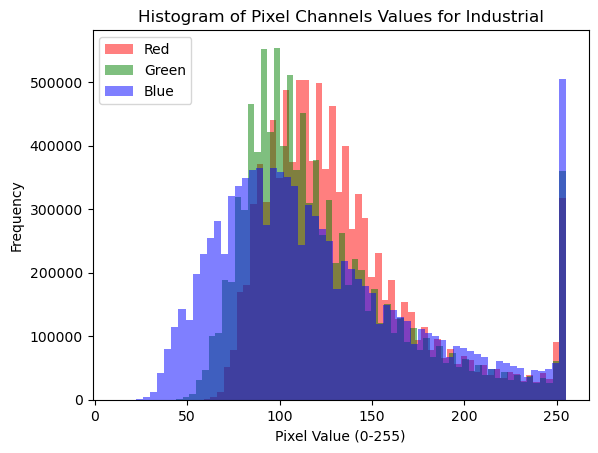

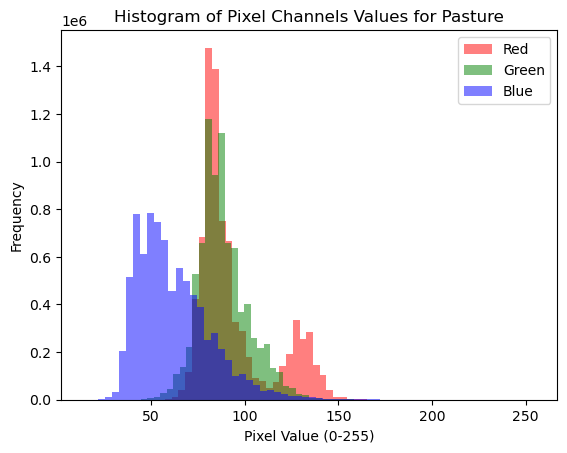

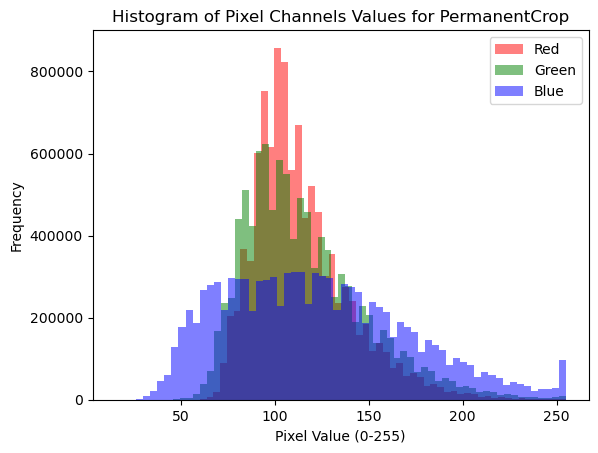

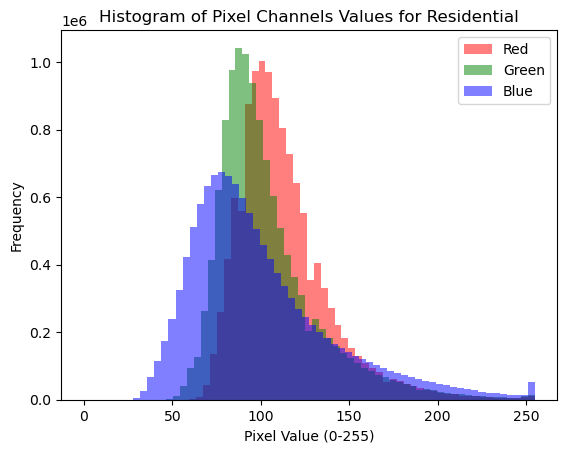

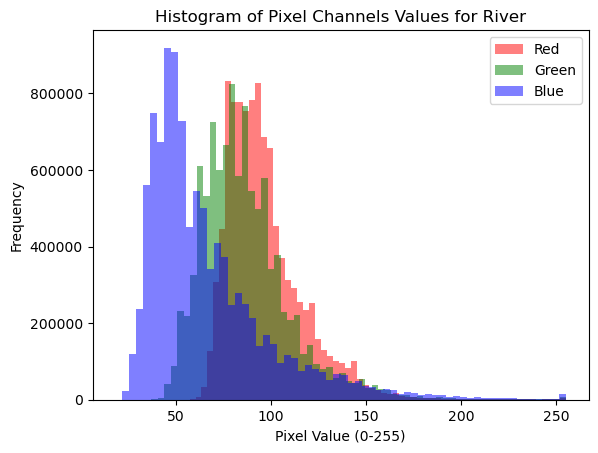

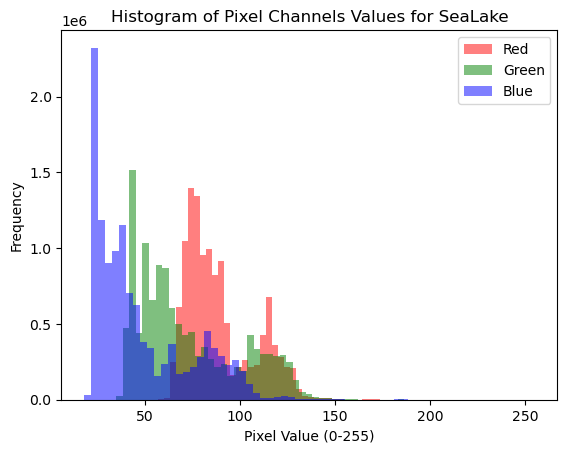

In [54]:
for folder_name in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder_name)
    
    if not os.path.isdir(folder_path):
        continue

    images = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpg"):
            file_path = os.path.join(folder_path, file_name)
            
            img = cv2.imread(file_path)
            
            images.append(img)
    
    pixel_values = {'Red': [], 'Green': [], 'Blue': []}

    for img in images:
        ch1, ch2, ch3 = cv2.split(img)
        pixel_values['Red'].extend(ch1.flatten())
        pixel_values['Green'].extend(ch2.flatten())
        pixel_values['Blue'].extend(ch3.flatten())

    for color, values in pixel_values.items():
        hist, bins = np.histogram(values, bins=32)
        plt.hist(bins[:-1], bins, weights=hist, alpha=0.5, label=color, color=color.lower())

    plt.legend()
    plt.xlabel('Pixel Value (0-255)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Pixel Channels Values for {}'.format(folder_name))
    plt.show()
        